## ライブラリのインポート

In [11]:
from sudachipy import tokenizer
from sudachipy import dictionary
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## CSVファイルを読み込む

In [12]:
df = pd.read_csv("../data/raw/project.csv")
df.head()

,id,name,description,desired_role,start_date,end_date,HTML,CSS,JavaScript,TypeScript,...,GCP,Docker,Kubernetes,MySQL,PostgreSQL,MongoDB,Git,Linux,Agile,Scrum
0,1,旅行予約システム設計,当プロジェクトでは運用保守、テスト、デプロイ、ドキュメント作成、自動テスト導入やインフラ構築...,QAエンジニア,2024-04-09,NaN,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,2,予約管理システム設計,現プロジェクトにおいてデータベース設計やデプロイなどに取り組んでいる。\n[実施内容]\nデ...,フルスタックエンジニア,2024-12-22,NaN,1,1,1,1,...,0,1,1,0,0,0,1,1,0,0
2,3,ブロックチェーン開発実装,要件定義、要件分析、パフォーマンス改善、自動テスト導入、クラウド移行やセキュリティ強化などの...,フルスタックエンジニア,2025-05-20,NaN,1,1,1,0,...,0,0,0,1,1,1,1,1,0,0
3,4,動画配信サービス改善,技術選定、UI/UX設計、セキュリティ強化、実装、デプロイやデータベース設計などの開発に取り...,インフラエンジニア,2024-11-24,NaN,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,5,物流管理システム改善,データベース設計、運用保守やチームマネジメントなどの開発に取り組んでいます。,SE,2024-02-22,NaN,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0


## 名詞抽出関数の定義

In [13]:
def extract_nouns(text: str):
    """
    テキストから名詞を抽出する関数
    """
    if pd.isna(text):
        return []

    # full辞書を使用して辞書オブジェクトを生成
    tokenizer_obj = dictionary.Dictionary(dict="full").create()
    # 形態素解析の粒度設定(C: 最も粗い)
    mode = tokenizer.Tokenizer.SplitMode.C

    # 形態素解析を実行
    morphemes = tokenizer_obj.tokenize(str(text), mode)

    nouns = []
    for m in morphemes:
        # 品詞情報を取得
        pos = m.part_of_speech()[0]
        if pos == "名詞":
            nouns.append(m.surface())
    return nouns

## プロジェクト名、説明文、役割から名詞を抽出

In [14]:
# 全プロジェクトの名詞を集計
all_nouns = Counter()

# プロジェクト名から名詞を抽出
for text in df["name"].dropna():
    nouns = extract_nouns(text)
    all_nouns.update(nouns)

# descriptionから名詞を抽出
for text in df["description"].dropna():
    nouns = extract_nouns(text)
    all_nouns.update(nouns)

# desired_roleから名詞を抽出
for text in df["desired_role"].dropna():
    nouns = extract_nouns(text)
    all_nouns.update(nouns)

print(f"総名詞種類数: {len(all_nouns)}")
print(f"総名詞出現回数: {sum(all_nouns.values())}")
print("\n上位20件:")
for noun, count in all_nouns.most_common(20):
    print(f"{noun}: {count}")

総名詞種類数: 125
総名詞出現回数: 16223

上位20件:
プロジェクト: 638
構築: 582
設計: 581
実装: 463
改善: 407
テスト: 400
導入: 386
技術: 345
システム設計: 333
エンジニア: 324
開発: 317
レビュー: 314
選定: 269
UI: 262
UX: 262
セキュリティ: 253
強化: 253
運用: 244
クラウド: 228
移行: 228


## 上位30件の名詞出現頻度を可視化

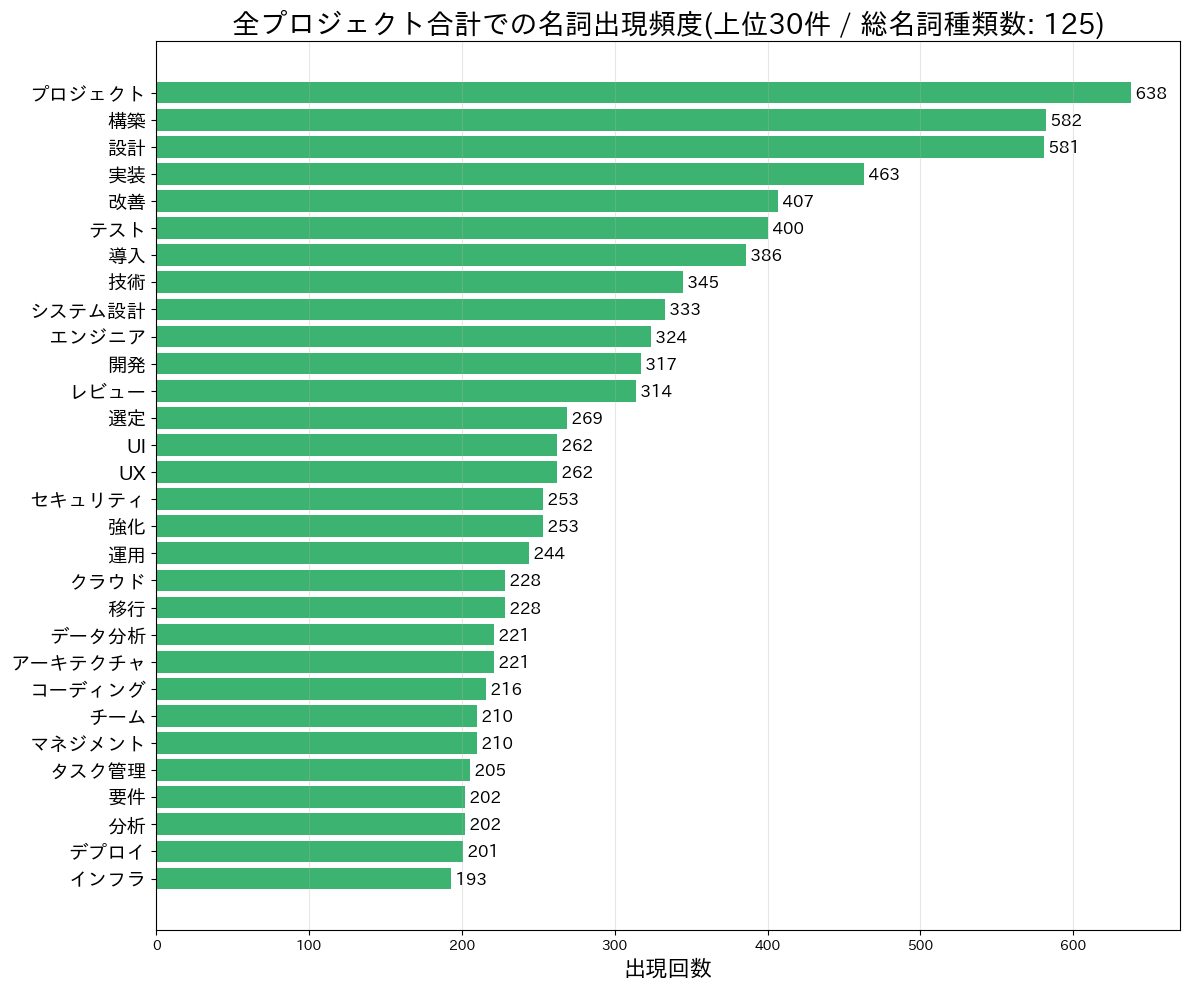

In [15]:
# 上位30件のグラフ
fig, ax = plt.subplots(figsize=(12, 10))

nouns_top30, counts_top30 = zip(*all_nouns.most_common(30))
ax.barh(range(len(nouns_top30)), counts_top30, color="mediumseagreen")
ax.set_yticks(range(len(nouns_top30)))
ax.set_yticklabels(nouns_top30, fontsize=14)
ax.invert_yaxis()
ax.set_xlabel("出現回数", fontsize=16)
ax.set_title(
    f"全プロジェクト合計での名詞出現頻度(上位30件 / 総名詞種類数: {len(all_nouns)})",
    fontsize=20,
    fontweight="bold",
)
ax.grid(axis="x", alpha=0.3)

for i, count in enumerate(counts_top30):
    ax.text(count, i, f" {count}", va="center", fontsize=12)

plt.tight_layout()
plt.show()